In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats as sts
import seaborn as sns

# Предобработка

Удалим дубликаты по цене.

In [ ]:
df_raw = pd.read_csv('our_project.csv')
df = df_raw.drop_duplicates(subset='Price_Total', keep='first')
df['Neighborhood'] = df['Neighborhood'].str.replace(' ', '').str.replace('-', '') #убрали пробелы и др. символы, чтоб ниче потом не мешало
print(df.shape)
df.head(10)

(451, 10)


<ipython-input-2-a3ab787a0732>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neighborhood'] = df['Neighborhood'].str.replace(' ', '').str.replace('-', '') #убрали пробелы и др. символы, чтоб ниче потом не мешало


,Price_Total,Area,Price_Meter,Rooms,Floor_Live,Floor_Total,Zone,Neighborhood,Distance,Time
0,1929750000,459.4,4200588,5,7,8,ЦАО,Якиманка,0.0,7.0
1,1884800000,417.3,4516655,4,13,14,ЦАО,Якиманка,0.0,7.0
2,1777100000,679.6,2614921,5,1,3,ЦАО,Тверскойрайон,0.0,3.0
3,1753570000,352.4,4976078,5,13,14,ЦАО,Якиманка,0.0,7.0
4,1649510000,659.4,2501532,5,1,3,ЦАО,Якиманка,0.0,7.0
5,1598855202,319.9,4997984,4,6,6,ЦАО,Тверскойрайон,0.0,5.0
6,1490280000,657.5,2266586,5,1,3,ЦАО,Тверскойрайон,0.0,3.0
7,1435410000,365.0,3932630,5,7,8,ЦАО,Якиманка,0.0,7.0
8,1248180000,473.8,2634403,2,1,3,ЦАО,Якиманка,0.0,7.0
9,1224130152,244.9,4998082,3,6,6,ЦАО,Тверскойрайон,0.0,5.0


In [ ]:
df[df.isna().any(axis=1)]

,Price_Total,Area,Price_Meter,Rooms,Floor_Live,Floor_Total,Zone,Neighborhood,Distance,Time


In [ ]:
df['log_price'] = np.log1p(df['Price_Total'])

<ipython-input-4-d892aec5faaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_price'] = np.log1p(df['Price_Total'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 0 to 499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price_Total   451 non-null    int64  
 1   Area          451 non-null    float64
 2   Price_Meter   451 non-null    int64  
 3   Rooms         451 non-null    object 
 4   Floor_Live    451 non-null    int64  
 5   Floor_Total   451 non-null    int64  
 6   Zone          451 non-null    object 
 7   Neighborhood  451 non-null    object 
 8   Distance      451 non-null    float64
 9   Time          451 non-null    float64
 10  log_price     451 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 42.3+ KB


Time - сколько идти до м

In [ ]:
df.loc[df['Rooms'] == 'своб. планировка', 'Rooms'] = np.int64(0)

In [ ]:
df['Rooms'] = df['Rooms'].astype('int64')

<ipython-input-7-42252db752d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rooms'] = df['Rooms'].astype('int64')


**Закодируем категориальные переменные с One-Hot-Encoding, чтобы получить дамми-переменные.**

In [ ]:
df = pd.get_dummies(df, columns = ['Zone', 'Neighborhood'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 0 to 499
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price_Total                       451 non-null    int64  
 1   Area                              451 non-null    float64
 2   Price_Meter                       451 non-null    int64  
 3   Rooms                             451 non-null    int64  
 4   Floor_Live                        451 non-null    int64  
 5   Floor_Total                       451 non-null    int64  
 6   Distance                          451 non-null    float64
 7   Time                              451 non-null    float64
 8   log_price                         451 non-null    float64
 9   Zone_ЗАО                          451 non-null    uint8  
 10  Zone_СВАО                         451 non-null    uint8  
 11  Zone_СЗАО                         451 non-null    uint8  
 12  Zone_ЦАО

In [ ]:
df.head()

,Price_Total,Area,Price_Meter,Rooms,Floor_Live,Floor_Total,Distance,Time,log_price,Zone_ЗАО,...,Neighborhood_Обручевскийрайон,Neighborhood_ПокровскоеСтрешнево,Neighborhood_Пресненскийрайон,Neighborhood_Раменки,Neighborhood_Ростокино,Neighborhood_Тверскойрайон,Neighborhood_Хамовники,Neighborhood_ХорошёвоМнёвники,Neighborhood_Щукино,Neighborhood_Якиманка
0,1929750000,459.4,4200588,5,7,8,0.0,7.0,21.380656,0,...,0,0,0,0,0,0,0,0,0,1
1,1884800000,417.3,4516655,4,13,14,0.0,7.0,21.357088,0,...,0,0,0,0,0,0,0,0,0,1
2,1777100000,679.6,2614921,5,1,3,0.0,3.0,21.298249,0,...,0,0,0,0,0,1,0,0,0,0
3,1753570000,352.4,4976078,5,13,14,0.0,7.0,21.284920,0,...,0,0,0,0,0,0,0,0,0,1
4,1649510000,659.4,2501532,5,1,3,0.0,7.0,21.223744,0,...,0,0,0,0,0,0,0,0,0,1


# EDA

In [ ]:
df['Price_Total']

0      1929750000
1      1884800000
2      1777100000
3      1753570000
4      1649510000
          ...    
495     118827136
496     118440000
497     118400000
498     118180000
499     118170000
Name: Price_Total, Length: 451, dtype: int64

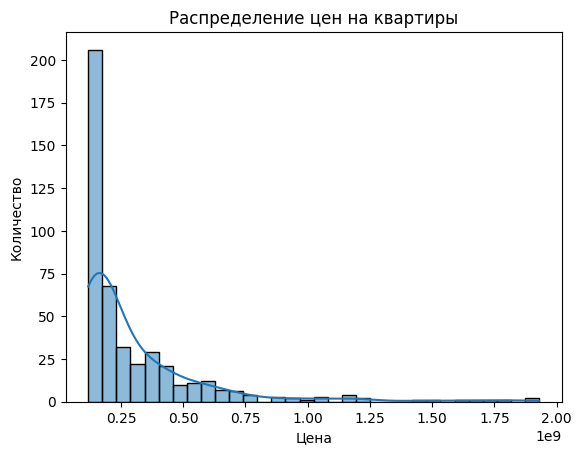

In [ ]:
sns.histplot(df['Price_Total'], kde = True)
plt.title('Распределение цен на квартиры')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()

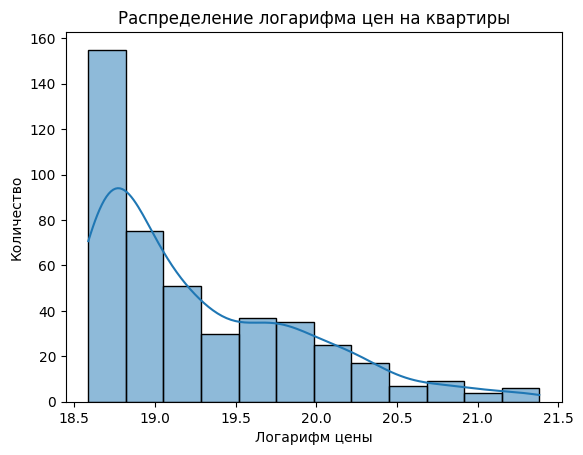

In [ ]:
sns.histplot(df['log_price'], kde = True)
plt.title('Распределение логарифма цен на квартиры')
plt.xlabel('Логарифм цены')
plt.ylabel('Количество')
plt.show()

Распределение логарифма выглядит лучше, будем рассматривать его как целевую переменную

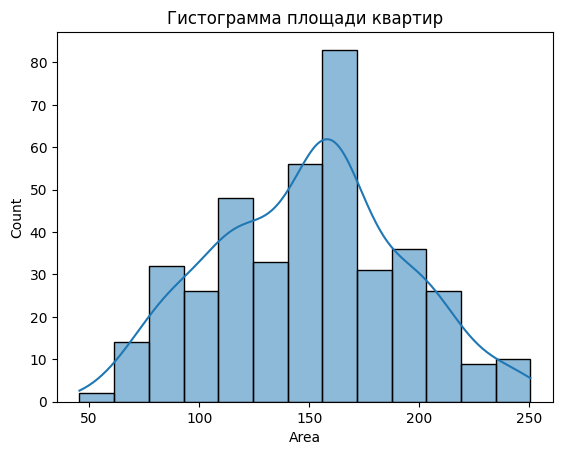

In [ ]:
quant = df['Area'].quantile(0.9)
sns.histplot(df[df['Area'] <= quant]['Area'], kde = True)
plt.title('Гистограмма площади квартир')
plt.xlabel('Area')
plt.ylabel('Count');

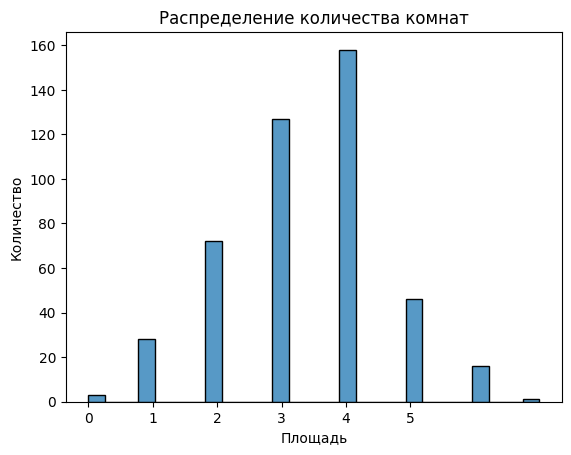

7


In [ ]:
sns.histplot(df['Rooms'])
plt.title('Распределение количества комнат')
plt.xticks(np.arange(0, 6, 1))
plt.xlabel('Площадь')
plt.ylabel('Количество')
plt.show()
print(max(df['Rooms']))

**Пояснение:** 0 комнат означает квартиру-студию.

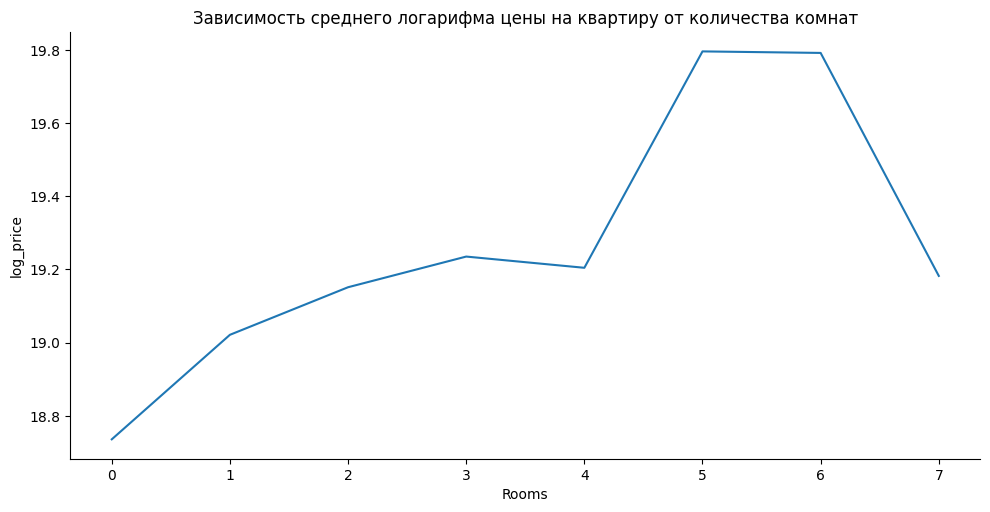

In [ ]:
mean_log_rooms = df.groupby('Rooms')['log_price'].mean().reset_index()
sns.relplot(data = mean_log_rooms, x = 'Rooms', y = 'log_price', kind = 'line', aspect = 2)
plt.title('Зависимость среднего логарифма цены на квартиру от количества комнат');

С ростом количества комнат растёт логарифм цены. Однако можно заметить, что между 5 и 6 комнатами цена не сильно изменяется, а с добавлением седьмой даже падает

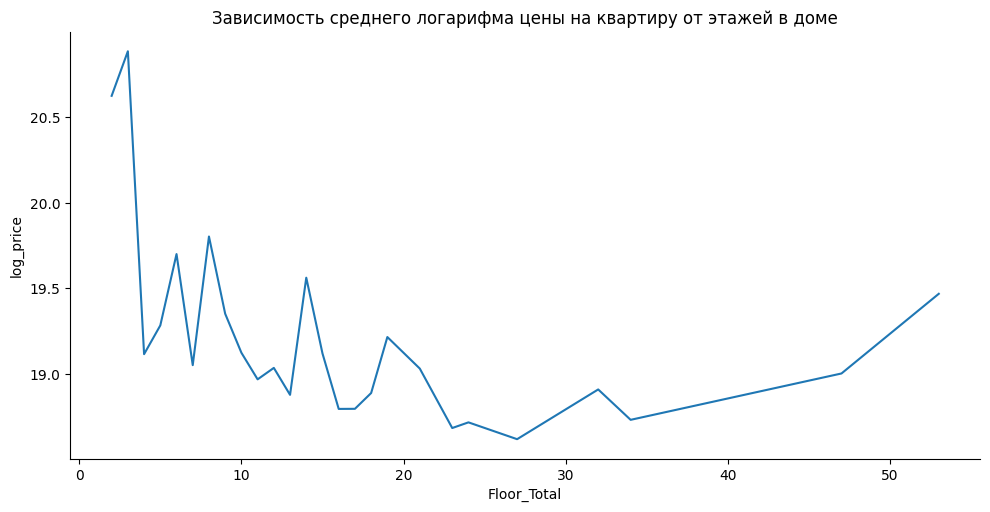

In [ ]:
mean_log_floor_total = df.groupby('Floor_Total')['log_price'].mean().reset_index()
sns.relplot(data = mean_log_floor_total, x = 'Floor_Total', y = 'log_price', kind = 'line', aspect = 2)
plt.title('Зависимость среднего логарифма цены на квартиру от этажей в доме');

Можно заметить, что самые большие цены в малоэтажных домах, с ростом количества этажей стоимость уменьшается, но потом опять можно заметить тенденцию роста в высотных домах (примерно с 35 этажа)

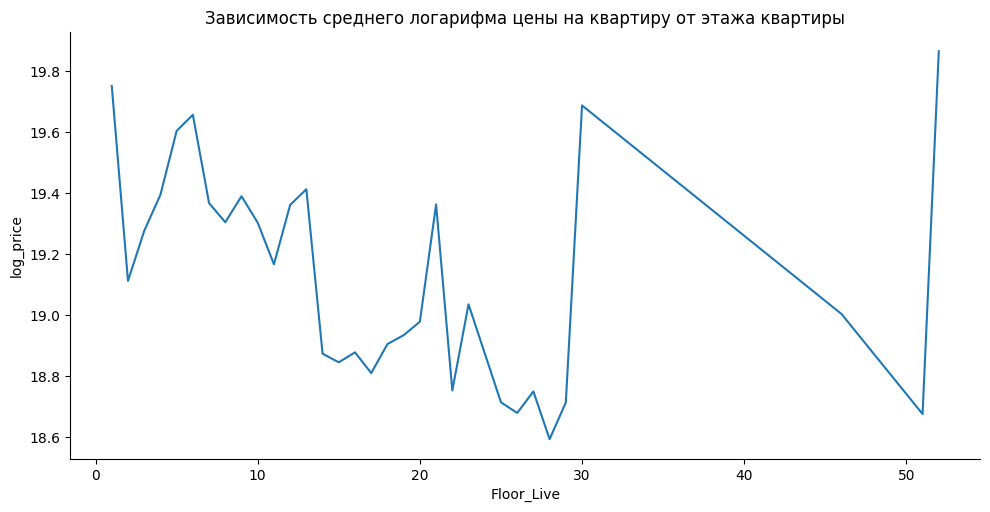

In [ ]:
mean_log_floor_live = df.groupby('Floor_Live')['log_price'].mean().reset_index()
sns.relplot(data = mean_log_floor_live, x = 'Floor_Live', y = 'log_price', kind = 'line', aspect = 2)
plt.title('Зависимость среднего логарифма цены на квартиру от этажа квартиры');

На графике с этажами, на которых располагается квартира тенденция похожа, однако есть резкие взлёты цен на квартиры на 30 этаже и выше 50

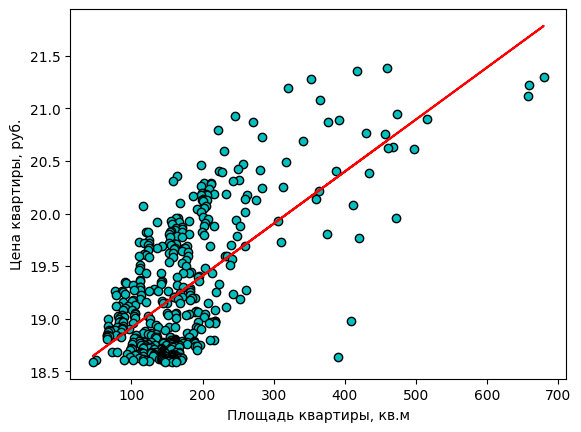

[4.95744363e-03 1.84168394e+01]
1694247.5809312637


In [ ]:
plt.scatter(df['Area'], df['log_price'], color = 'c', edgecolor='black')

fit = np.polyfit(df['Area'], df['log_price'], 1)
plt.plot(df['Area'], fit[0] * df['Area'] + fit[1], color='red')

plt.xlabel('Площадь квартиры, кв.м')
plt.ylabel('Цена квартиры, руб.')
plt.show()

print(fit)
print(df['Price_Meter'].mean())

**Соотношение площади квартиры с ее ценой. Построение полиномиальной регрессии.**

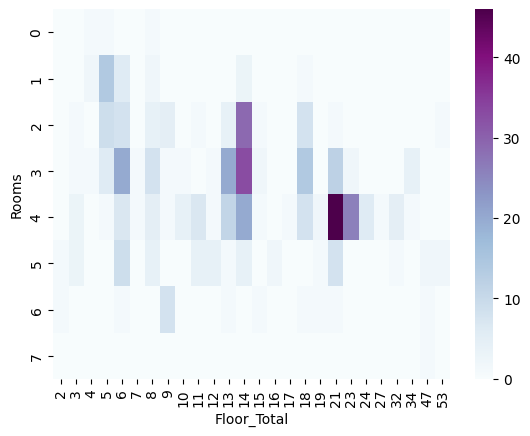

In [ ]:
cross_tab = pd.crosstab(df['Rooms'], df['Floor_Total'])
sns.heatmap(cross_tab, cmap='BuPu');

**Наиболее популярное сочетание: 4 комнатная квартира в 23-х этажнем доме.**

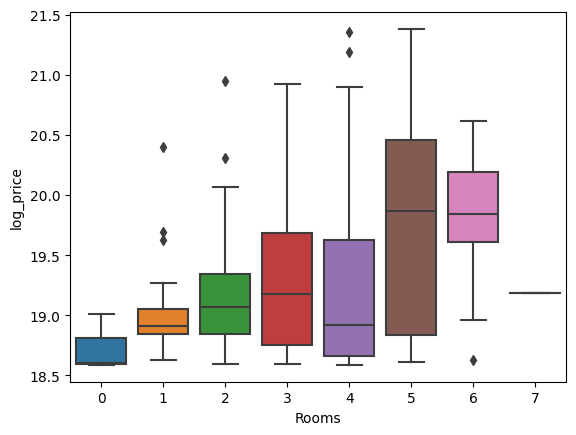

In [ ]:
sns.boxplot(x = df['Rooms'], y = df['log_price']);

Разброс цен на 3,4 и 5-комнатные квартиры достаточно большой, коробки и усы значительно длинней остальных квартир

In [ ]:
df.columns

Index(['Price_Total', 'Area', 'Price_Meter', 'Rooms', 'Floor_Live',
       'Floor_Total', 'Distance', 'Time', 'log_price', 'Zone_ЗАО', 'Zone_СВАО',
       'Zone_СЗАО', 'Zone_ЦАО', 'Zone_ЮАО', 'Zone_ЮЗАО',
       'Neighborhood_Академическийрайон', 'Neighborhood_Арбат',
       'Neighborhood_Басманныйрайон', 'Neighborhood_Даниловскийрайон',
       'Neighborhood_Дорогомилово', 'Neighborhood_Коньково',
       'Neighborhood_Красносельскийрайон', 'Neighborhood_Марфино',
       'Neighborhood_Обручевскийрайон', 'Neighborhood_ПокровскоеСтрешнево',
       'Neighborhood_Пресненскийрайон', 'Neighborhood_Раменки',
       'Neighborhood_Ростокино', 'Neighborhood_Тверскойрайон',
       'Neighborhood_Хамовники', 'Neighborhood_ХорошёвоМнёвники',
       'Neighborhood_Щукино', 'Neighborhood_Якиманка'],
      dtype='object')

In [ ]:
correlations = df[['Zone_ЗАО', 'Zone_СВАО', 'Zone_СЗАО', 'Zone_ЦАО', 'Zone_ЮАО', 'Zone_ЮЗАО', 'Price_Total']].corr()
correlations['Price_Total']

Zone_ЗАО      -0.176548
Zone_СВАО     -0.042133
Zone_СЗАО     -0.073856
Zone_ЦАО       0.247070
Zone_ЮАО      -0.107491
Zone_ЮЗАО     -0.054393
Price_Total    1.000000
Name: Price_Total, dtype: float64

**Здесь мы видим, что статистически благоприятно влияет на цену квартиры ее расположение, например, в Центральном Автономном Округе. Противоположная ситуация, например, в Южном, Западном Автомных Округах.**

In [ ]:
correlations = df[['Neighborhood_Академическийрайон', 'Neighborhood_Арбат',
       'Neighborhood_Басманныйрайон', 'Neighborhood_Даниловскийрайон',
       'Neighborhood_Дорогомилово', 'Neighborhood_Коньково',
       'Neighborhood_Красносельскийрайон', 'Neighborhood_Марфино',
       'Neighborhood_Обручевскийрайон', 'Neighborhood_ПокровскоеСтрешнево',
       'Neighborhood_Пресненскийрайон', 'Neighborhood_Раменки',
       'Neighborhood_Ростокино', 'Neighborhood_Тверскойрайон',
       'Neighborhood_Хамовники', 'Neighborhood_ХорошёвоМнёвники',
       'Neighborhood_Щукино', 'Neighborhood_Якиманка', 'Price_Total']].corr()
correlations['Price_Total']

Neighborhood_Академическийрайон    -0.030183
Neighborhood_Арбат                 -0.073348
Neighborhood_Басманныйрайон         0.070389
Neighborhood_Даниловскийрайон      -0.107491
Neighborhood_Дорогомилово          -0.129783
Neighborhood_Коньково              -0.035730
Neighborhood_Красносельскийрайон   -0.025305
Neighborhood_Марфино               -0.030027
Neighborhood_Обручевскийрайон      -0.028713
Neighborhood_ПокровскоеСтрешнево   -0.040557
Neighborhood_Пресненскийрайон      -0.201221
Neighborhood_Раменки               -0.110234
Neighborhood_Ростокино             -0.029491
Neighborhood_Тверскойрайон          0.137794
Neighborhood_Хамовники             -0.067830
Neighborhood_ХорошёвоМнёвники      -0.053986
Neighborhood_Щукино                -0.029793
Neighborhood_Якиманка               0.351874
Price_Total                         1.000000
Name: Price_Total, dtype: float64

**Здесь аналогично мы видим, что статистически благоприятно влияет на цену квартиры ее расположение, например, в Тверском, Якиманке, Басманном районах Москвы. Противоположная ситуация, например, в Пресненском районе.**

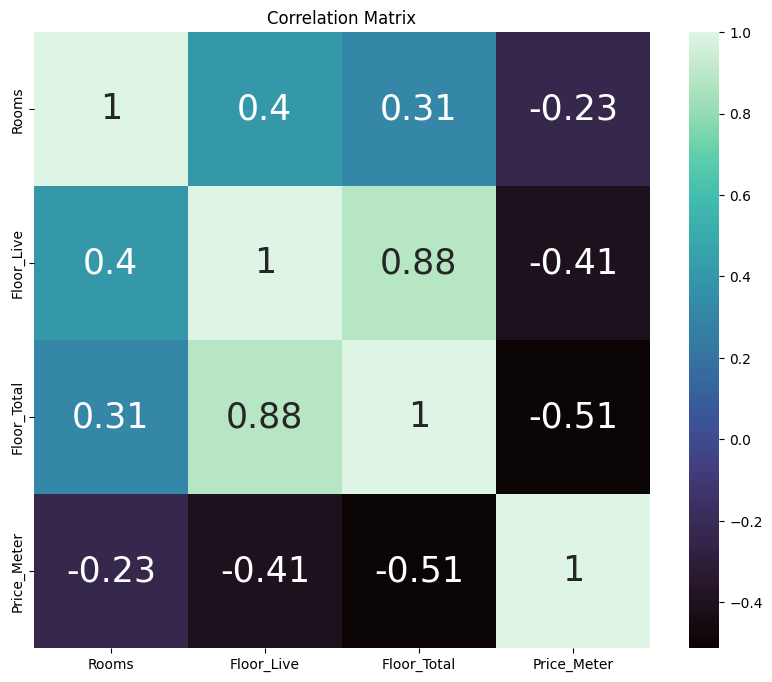

In [ ]:
correlations = df[['Rooms', 'Floor_Live', 'Floor_Total', 'Price_Meter']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='mako', square=True, annot_kws={"fontsize": 25})
plt.title('Correlation Matrix')
plt.show()

**Здесь мы видим, что количество комнат, этаж и общее количество этажей негативно влияет на цену за квадратный ментр. Кроме того, также можно заметить положительное влияние количества этажей и этаж, на котором располагается квартира, на количество комнат.**

# Модель

In [ ]:
df.columns

Index(['Price_Total', 'Area', 'Price_Meter', 'Rooms', 'Floor_Live',
       'Floor_Total', 'Distance', 'Time', 'log_price', 'Zone_ЗАО', 'Zone_СВАО',
       'Zone_СЗАО', 'Zone_ЦАО', 'Zone_ЮАО', 'Zone_ЮЗАО',
       'Neighborhood_Академическийрайон', 'Neighborhood_Арбат',
       'Neighborhood_Басманныйрайон', 'Neighborhood_Даниловскийрайон',
       'Neighborhood_Дорогомилово', 'Neighborhood_Коньково',
       'Neighborhood_Красносельскийрайон', 'Neighborhood_Марфино',
       'Neighborhood_Обручевскийрайон', 'Neighborhood_ПокровскоеСтрешнево',
       'Neighborhood_Пресненскийрайон', 'Neighborhood_Раменки',
       'Neighborhood_Ростокино', 'Neighborhood_Тверскойрайон',
       'Neighborhood_Хамовники', 'Neighborhood_ХорошёвоМнёвники',
       'Neighborhood_Щукино', 'Neighborhood_Якиманка'],
      dtype='object')

Рассматриваем как целевую переменную логарифм цены, поэтому можем удалить Price_Meter и Price_Total (почти та же целевая переменная, поэтому как признак не можем рассматривать).

In [ ]:
data = df.drop(['Price_Meter', 'Price_Total'], axis = 1)

In [ ]:
data.columns

Index(['Area', 'Rooms', 'Floor_Live', 'Floor_Total', 'Distance', 'Time',
       'log_price', 'Zone_ЗАО', 'Zone_СВАО', 'Zone_СЗАО', 'Zone_ЦАО',
       'Zone_ЮАО', 'Zone_ЮЗАО', 'Neighborhood_Академическийрайон',
       'Neighborhood_Арбат', 'Neighborhood_Басманныйрайон',
       'Neighborhood_Даниловскийрайон', 'Neighborhood_Дорогомилово',
       'Neighborhood_Коньково', 'Neighborhood_Красносельскийрайон',
       'Neighborhood_Марфино', 'Neighborhood_Обручевскийрайон',
       'Neighborhood_ПокровскоеСтрешнево', 'Neighborhood_Пресненскийрайон',
       'Neighborhood_Раменки', 'Neighborhood_Ростокино',
       'Neighborhood_Тверскойрайон', 'Neighborhood_Хамовники',
       'Neighborhood_ХорошёвоМнёвники', 'Neighborhood_Щукино',
       'Neighborhood_Якиманка'],
      dtype='object')

In [ ]:
X = data.drop('log_price', axis = 1)
y = data['log_price']

R^2 в нашей модели получился достаточно высоким как на обучающей выборке, так и на тестовой, значит, модель достаточно точно предсказывает данные

In [ ]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
smmry = model.summary()
print(smmry)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     103.7
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          9.24e-159
Time:                        09:15:14   Log-Likelihood:                -17.092
No. Observations:                 451   AIC:                             82.18
Df Residuals:                     427   BIC:                             180.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
with open('reg_table.tex', 'w') as f:
  f.write(smmry.as_latex())

**Нулевая гипотеза:** Время до метро не значимо для цен элитных квартир, так как предположительно владельцы данных квартир чаще перемещаются на машине и редко пользуются метро. Кроме того, коэффициент при переменной Time должен быть отрицательный, так как люди с достатком предпочитают тихие и уютные районы, а наличие метро означает огромный поток людей ежедневно.

**Альтернативная гипотеза:** Время до метро значимо для цен элитных квартир

In [ ]:
#нулевая гипотеза: время до метро не значимо для элитных квартир,
#так как предположительно владельцы данных квартир чаще перемещаются на машине и редко пользуются метро.
t_crit = sts.t.ppf(0.975, len(data) - 1)
t_stat = -1.564
if t_stat > t_crit:
  print('Нулевая гипотеза отклоняется. Время до метро имеет значение и для стоимости элитных квартир.')
else:
  print('Нулевая гипотеза подтверждается. Время до метро может не являться статистически значимой для стоимости элитных квартир в Москве.')
print()

Время до метро может не являться статистически значимой для стоимости элитных квартир в Москве.


**Нулевая гипотеза:** Расположение квартиры на первом этаже оказывает негативное влияние на ее цену, а расположение квартир на последнем этаже - положительное, т.к. в элитном сегменте на последних этажах часто располагаются комфортабельные пейнтхаусы, в то время как первый этаж - одинаково не желаем как в элитном, так и в бюджетном сегменте

**Альтернативная гипотеза:**

In [ ]:
last_floor =  data.loc[data['Floor_Total'] == data['Floor_Live']]
first_floor = data.loc[data['Floor_Live'] == 1]
first_last = pd.concat([first_floor, last_floor], axis = 0)
other_floors = data.loc[data.index.difference(first_last.index)]
#получили таблицы с квартирами на первом и последнем этаже и другие
#за H_0 берём: Нет статистической разницы в ценах на квартиру на первых и последних этажах и на других
t_stat, p_val = sts.ttest_ind(first_last['log_price'], other_floors['log_price'])
if p_val < 0.05:
  print('Нулевая гипотеза отвергается. \nСуществует статистическая разница в ценах на квартиры на первых и последних этажах и на других')
else:
  print('Расположение квартиры на первом и последнем этаже может не влиять на цену')

Нулевая гипотеза отвергается. 
Существует статистическая разница в ценах на квартиры на первых и последних этажах и на других


**Нулевая гипотеза:** стоимость кв. метра однокомнатной квартиры не имеет статистической разницы со стоимостью кв. метра многокомнатной квартиры

**Альтернативная гипотеза:** стоимость кв. метра однокомнатной квартиры имеет статистическую разницу со стоимостью кв. метра многокомнатной квартиры, так как однокомнатные квартиры элитного сегмента чаще всего располагаются в менее престижных домах (например, Москва-Сити, где есть большое количество 1-комнатных квартир, и ЖК Гранатный Палас, где есть квартиры только от 3-х комнат)

In [ ]:
one_room = df.loc[(df['Rooms'] == 1) | (df['Rooms'] == 0)]
more_one_room = df.loc[df['Rooms'] > 1]
#получили таблицы с однокомнатными квартирами (в тч студиями) и многокомнатными
t_stat, p_val = sts.ttest_ind(one_room['Price_Meter'], more_one_room['Price_Meter'])
#нулевая гипотеза: стоимость квадратного метра однокомнатной квартиры не имеет статистической разницы со стоимостью кв метра многокомнатной квартиры
if p_val < 0.05:
  print('Нулевая гипотеза отвергается. \nЕсть статистическая разница в цене за кв метр между однокомнатными и многокомнатными квартирами')
else:
  print('Может и не быть статистической разницы в цене за квадртаный метр между однокомнатными и многокомнатными квартирами')

Нулевая гипотеза отвергается. 
Есть статистическая разница в цене за кв метр между однокомнатными и многокомнатными квартирами
